<a href="https://colab.research.google.com/github/srigstinahf/Tugas-PERT4_AI_SRI-GUSTINAH-20220801012-/blob/main/Sri_gustinah(20220801012)_TUGAS_AI_PERT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

upload File ke google colab

In [ ]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()


Saving student-mat.csv to student-mat.csv


Read the CSV file

In [ ]:
import pandas as pd

# Read the uploaded CSV file
df = pd.read_csv('student-mat.csv')

# Display the first few rows of the dataset
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Checking Data

In [ ]:
# Check for missing values
df.isnull().sum()

# Get basic statistics of the dataset
df.describe()

# Get information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Import Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Baca dataset
df = pd.read_csv('student-mat.csv')

# Lihat beberapa baris pertama dari dataset
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Processing Data

In [ ]:
# Cek missing values
print(df.isnull().sum())

# Encode variabel kategorikal
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

    # Tampilkan beberapa baris pertama dataset setelah encoding
    df.head()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


Pisahkan Data

In [ ]:
# Pisahkan fitur dan target
X = df.drop(columns=['G3'])  # Misalkan kita ingin memprediksi kolom 'G3' (nilai akhir)
y = df['G3']

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lihat ukuran data
print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')


Training data shape: (316, 32)
Test data shape: (79, 32)


Train Model (Random Forest)

In [ ]:
# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Evaluasi Model

In [ ]:
# Prediksi pada data pengujian
y_pred = rf_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3.4867417721518983
R-squared: 0.8299569015097052


Interpretasi Hasil:
Jika nilai Mean Squared Error (MSE) rendah dan nilai R-squared (R²) mendekati 1, itu berarti model memiliki performa yang baik.

**Membuat** **Diagram** **Scatter** **Plot** **dan** **Residual** **Plot**

**Scatter** **Plot**: Diagram ini menampilkan nilai asli (sumbu y) terhadap nilai prediksi (sumbu x). Garis merah diagonal menunjukkan garis ideal jika prediksi benar-benar sama dengan nilai asli. Jika titik-titik data mendekati garis ini, model memiliki akurasi yang baik.

**Residual** **Plot**: Diagram ini menggambarkan perbedaan (residuals) antara nilai prediksi dan nilai asli terhadap nilai prediksi. Garis horizontal di 0 menunjukkan tidak ada kesalahan. Penyebaran titik yang acak menunjukkan bahwa model tidak memiliki pola sistematis dalam kesalahannya.



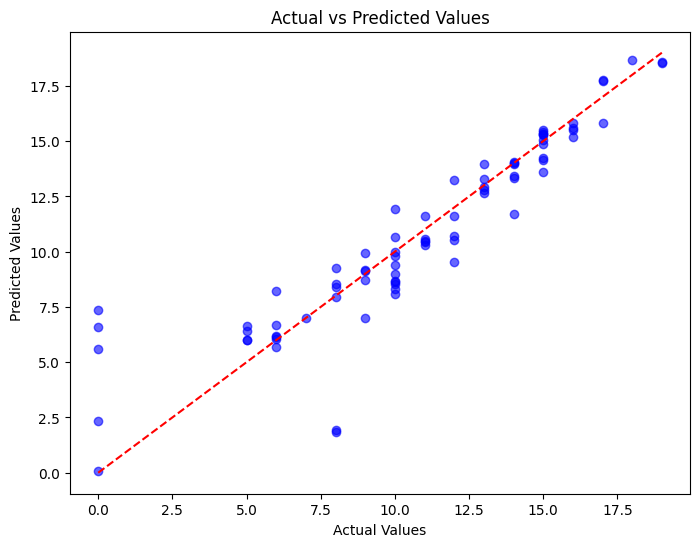

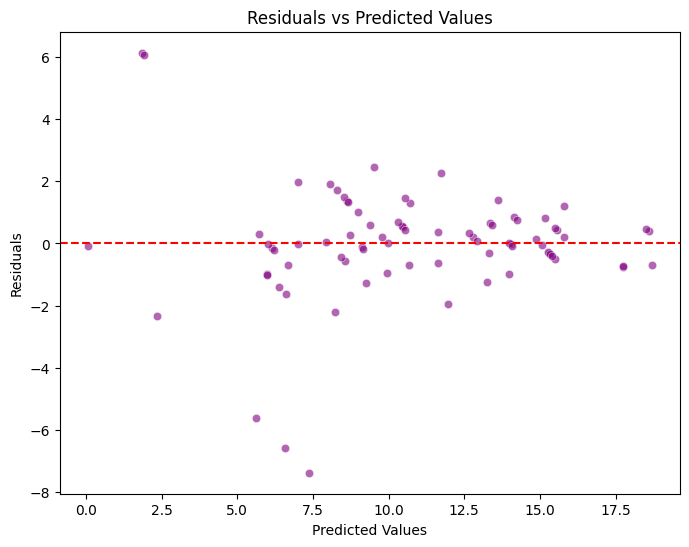

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Nilai asli vs Nilai prediksi
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Residual plot: Residuals (error) vs Nilai prediksi
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
